In [408]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pmdarima as pm
import plotly.express as px
import seaborn as sns

In [409]:
df = pd.read_csv("perrin-freres-monthly-champagne.csv")

In [410]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [411]:
df.shape

(107, 2)

In [412]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [413]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [414]:
df.dropna(inplace = True)

In [415]:
df['Month']=pd.to_datetime(df['Month'])

In [416]:
df.set_index('Month',inplace=True)

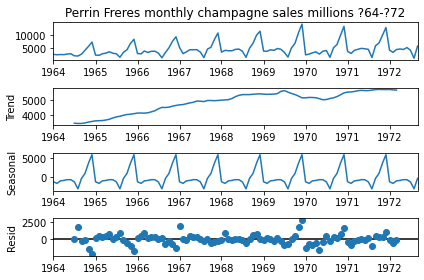

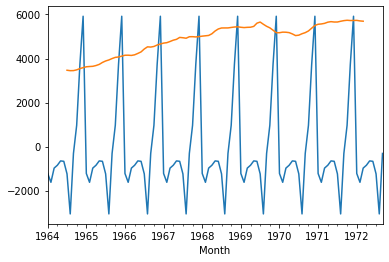

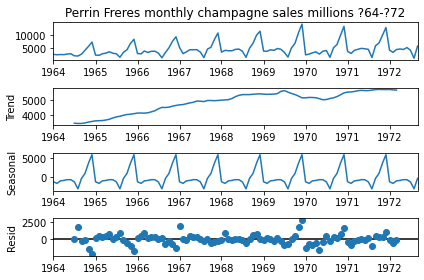

In [417]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Perrin Freres monthly champagne sales millions ?64-?72'], model = 'additive', period = 12)
result.seasonal.plot()
result.trend.plot()
result.plot()

In [418]:
def adf(col):
    adf = adfuller(df.loc[:, col].values, autolag = 'AIC')
    print("ADF Statistic:", adf[0])
    print("p-value:", adf[1])
    print("n_lags:", adf[2])
    for key, value in adf[4].items():
        print("Critical values:", key, value)
    if(adf[1]<0.05):
        print("Stationary data")
    else:
        print("Non-stationary data") 

In [419]:
adf('Perrin Freres monthly champagne sales millions ?64-?72')

ADF Statistic: -1.8335930563276195
p-value: 0.3639157716602467
n_lags: 11
Critical values: 1% -3.502704609582561
Critical values: 5% -2.8931578098779522
Critical values: 10% -2.583636712914788
Non-stationary data


<AxesSubplot:xlabel='Month'>

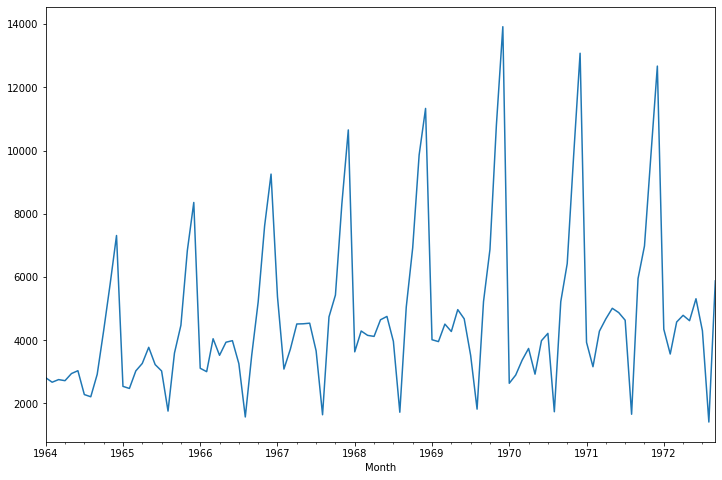

In [420]:
df['Perrin Freres monthly champagne sales millions ?64-?72'].plot(figsize=(12,8))

In [421]:
df["diff"] = df["Perrin Freres monthly champagne sales millions ?64-?72"].diff(periods=1)

In [422]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72,diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [423]:
df = df.dropna()

In [424]:
results = adfuller(df["diff"].dropna())

<AxesSubplot:xlabel='Month'>

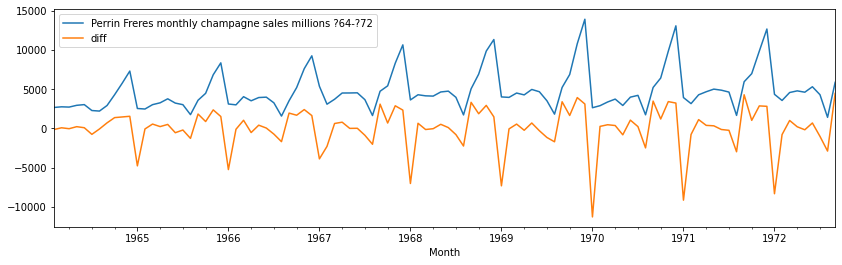

In [425]:
df.plot(figsize=(14, 4))

In [426]:
adf('diff')

ADF Statistic: -7.189896448050992
p-value: 2.5196204473871814e-10
n_lags: 11
Critical values: 1% -3.503514579651927
Critical values: 5% -2.893507960466837
Critical values: 10% -2.583823615311909
Stationary data


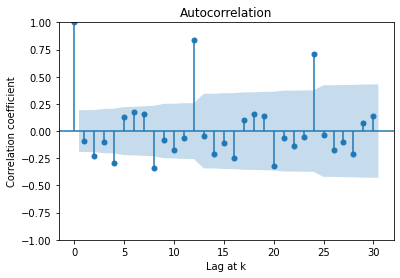

In [427]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(df["diff"], lags=30)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



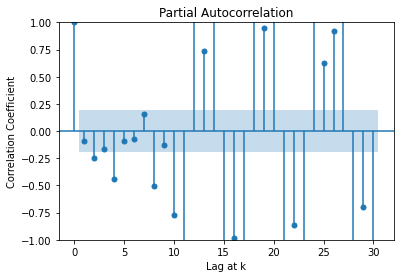

In [428]:
fig = tsaplots.plot_pacf(df["diff"], lags=30)

plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show()

In [429]:
arima_model = pm.arima.auto_arima(df['diff'], start_p=0, start_q = 0,
                                  max_p = 5, max_d=5, max_q=5, start_P=0,
                                  D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                                  m=12, season = True, trace = True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1526.661, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1506.848, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1524.662, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1511.610, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1508.254, Time=0.64 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1508.759, Time=0.18 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1507.183, Time=0.25 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1510.222, Time=1.08 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1516.671, Time=0.15 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1499.558, Time=0.13 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=1502.702, Time=0.10 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1501.005, Time=0.68 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=1501.017, Time=0.43 sec
 ARIMA(2,0,0)(0,1,1)[12]

In [430]:
model_arima=sm.tsa.arima.ARIMA(df['diff'],order=(1,1,0))
model_arima_fit=model_arima.fit()

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [431]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  104
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -987.131
Date:                Mon, 27 Mar 2023   AIC                           1978.262
Time:                        14:46:21   BIC                           1983.532
Sample:                    02-01-1964   HQIC                          1980.397
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4351      0.087     -4.982      0.000      -0.606      -0.264
sigma2      1.248e+07   9.76e+05     12.778      0.000    1.06e+07    1.44e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.88   Jarque-Bera (JB):               137.07
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               5.17   Skew:                            -1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

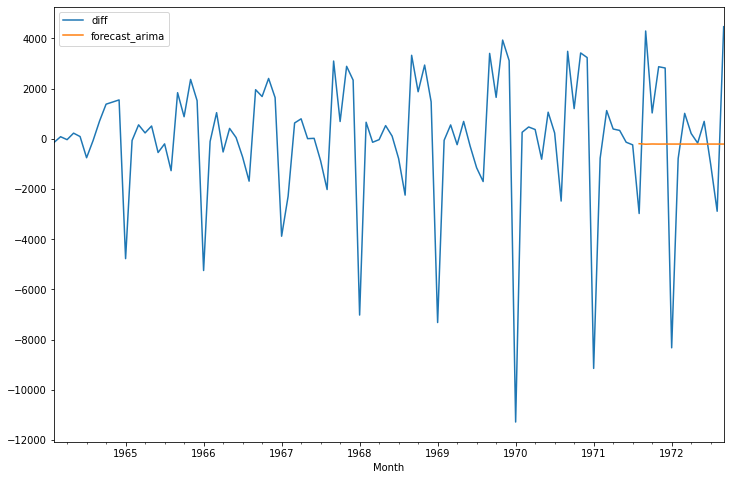

In [432]:
df['forecast_arima']=model_arima_fit.predict(start=90,end=104,dynamic=True)
df[['diff','forecast_arima']].plot(figsize=(12,8))

In [433]:
model_sarima=sm.tsa.statespace.SARIMAX(df['diff'],order=(1, 1, 0),seasonal_order=(1,1,1,12))
model_sarima_fit=model_sarima.fit()

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<AxesSubplot:xlabel='Month'>

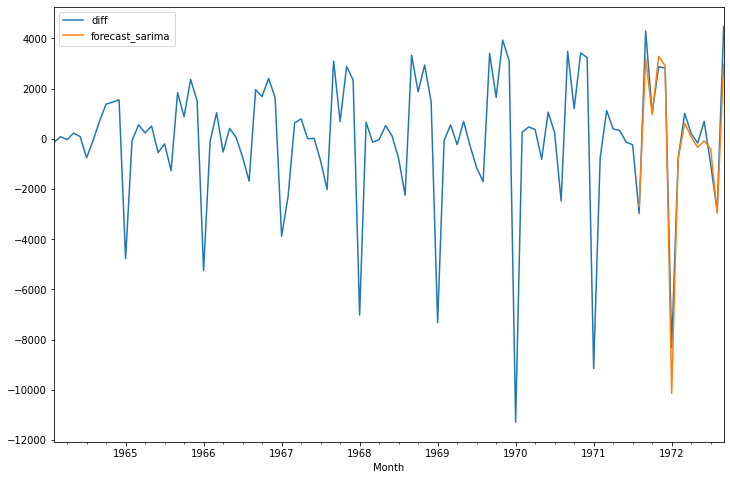

In [434]:
df['forecast_sarima']=model_sarima_fit.predict(start=90,end=104,dynamic=True)
df[['diff','forecast_sarima']].plot(figsize=(12,8))

In [435]:
from pandas.tseries.offsets import DateOffset

future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [436]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [437]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

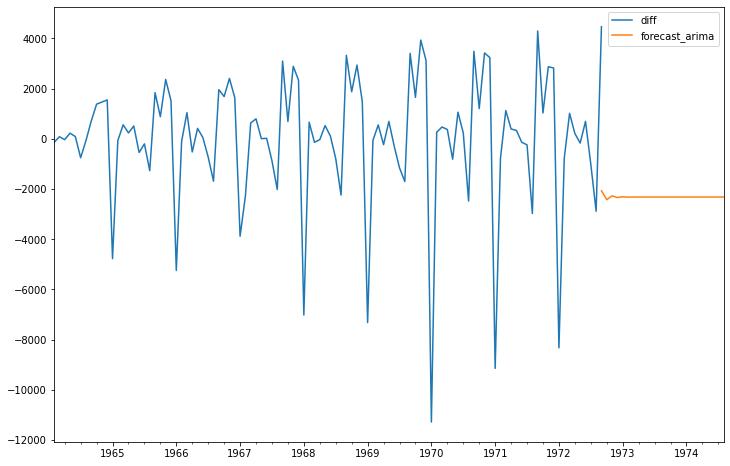

In [438]:
future_df['forecast_arima'] = model_arima_fit.predict(start = 103, end = 150, dynamic= True)  
future_df[['diff', 'forecast_arima']].plot(figsize=(12, 8))

<AxesSubplot:>

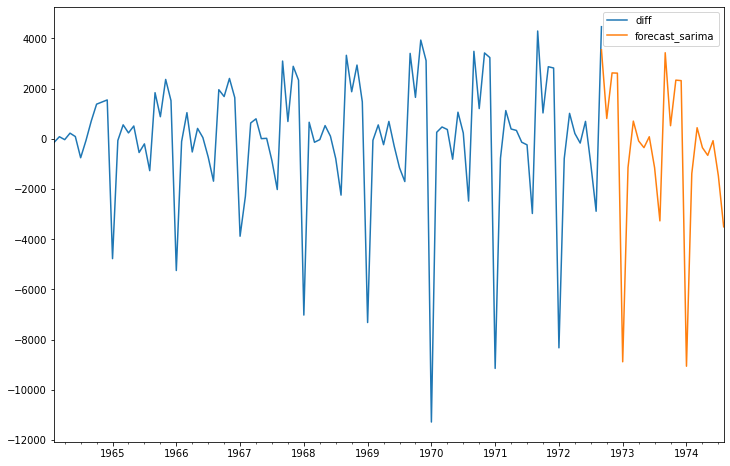

In [439]:
future_df['forecast_sarima'] = model_sarima_fit.predict(start = 103, end = 150, dynamic= True)  
future_df[['diff', 'forecast_sarima']].plot(figsize=(12, 8))